# Sale-Data 

## Data Analysis process




### Question 1:
What was the best month for sales? How much was earned that month?

### Question 2:
Which city had the highest number of sales?

### Question 3:
What is the best time to display advertisements to maximize the likelihood of customers' buying products?

### Question 4:
What products are most often sold together?

### Question 5:
Which product has the highest sales(based on quantity)? Why do you think it has the highest sales?

### Question 6:
Find the products with the highest popularity in each month of the year 2019?


### Import Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
shopping_df = pd.read_csv("E:\AI-ML/sales_data.csv")
shopping_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502.0,iPhone,1.0,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503.0,AA Batteries (4-pack),1.0,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504.0,27in 4K Gaming Monitor,1.0,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505.0,Lightning Charging Cable,1.0,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506.0,AA Batteries (4-pack),2.0,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
372985,295660.0,AAA Batteries (4-pack),2.0,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
372986,295661.0,USB-C Charging Cable,1.0,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
372987,295662.0,Lightning Charging Cable,1.0,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
372988,295663.0,AAA Batteries (4-pack),1.0,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


#### Cleaning the data

In [3]:
## Find out null and count the null values

shopping_df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [4]:
# Removing null values.

shopping_df = shopping_df.dropna()
shopping_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502.0,iPhone,1.0,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503.0,AA Batteries (4-pack),1.0,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504.0,27in 4K Gaming Monitor,1.0,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505.0,Lightning Charging Cable,1.0,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506.0,AA Batteries (4-pack),2.0,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
372985,295660.0,AAA Batteries (4-pack),2.0,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
372986,295661.0,USB-C Charging Cable,1.0,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
372987,295662.0,Lightning Charging Cable,1.0,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
372988,295663.0,AAA Batteries (4-pack),1.0,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


In [5]:
# Re-Check null values.

shopping_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Question 1:

 What was the best month for sales? How much was earned that month?

In [6]:
# Data types

shopping_df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [7]:
# Convert to datetime

shopping_df['Order Date'] = pd.to_datetime(shopping_df['Order Date'])
shopping_df['Order Date']

<ipython-input-7-2c95169364e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Order Date'] = pd.to_datetime(shopping_df['Order Date'])


0        2019-02-18 01:35:00
1        2019-02-13 07:24:00
2        2019-02-18 09:46:00
3        2019-02-02 16:47:00
4        2019-02-28 20:32:00
                 ...        
372985   2019-11-04 14:17:00
372986   2019-11-23 07:22:00
372987   2019-11-13 16:12:00
372988   2019-11-17 17:08:00
372989   2019-11-17 16:13:00
Name: Order Date, Length: 371900, dtype: datetime64[ns]

In [8]:
# convert into 'int' - "Order ID" datatype using 'astype'

shopping_df['Order ID'] = shopping_df['Order ID'].astype(dtype=int)

<ipython-input-8-1941cac9bb4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Order ID'] = shopping_df['Order ID'].astype(dtype=int)


In [9]:
# changing Time ,, Our requirement

shopping_df['Hour'] = shopping_df['Order Date'].dt.hour
shopping_df['Minute'] = shopping_df['Order Date'].dt.minute
shopping_df.head()

<ipython-input-9-a37b3035c388>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Hour'] = shopping_df['Order Date'].dt.hour
<ipython-input-9-a37b3035c388>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Minute'] = shopping_df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Minute
0,150502,iPhone,1.0,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",1,35
1,150503,AA Batteries (4-pack),1.0,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",7,24
2,150504,27in 4K Gaming Monitor,1.0,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",9,46
3,150505,Lightning Charging Cable,1.0,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",16,47
4,150506,AA Batteries (4-pack),2.0,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",20,32


In [10]:
#Add month col

shopping_df['Month'] = shopping_df['Order Date'].dt.month
shopping_df['Month']

<ipython-input-10-f250607333af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Month'] = shopping_df['Order Date'].dt.month


0          2
1          2
2          2
3          2
4          2
          ..
372985    11
372986    11
372987    11
372988    11
372989    11
Name: Month, Length: 371900, dtype: int64

In [11]:
# Convert to int

shopping_df['Quantity Ordered'] = shopping_df['Quantity Ordered'].astype(dtype = int)
shopping_df['Order ID'] = shopping_df['Order ID'].astype(dtype =int)

<ipython-input-11-ce53bc938973>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Quantity Ordered'] = shopping_df['Quantity Ordered'].astype(dtype = int)
<ipython-input-11-ce53bc938973>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Order ID'] = shopping_df['Order ID'].astype(dtype =int)


In [12]:
#convert to float 

shopping_df['Price Each'] = shopping_df['Price Each'].astype(dtype = float)

<ipython-input-12-1e67a09b7a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Price Each'] = shopping_df['Price Each'].astype(dtype = float)


In [13]:
# Re-Check datatypes

shopping_df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Hour                         int64
Minute                       int64
Month                        int64
dtype: object

### Analysis

Find the month which has the highest sales and print the sales along with the name of the month?

In [14]:
# Add a Sales column 

shopping_df['Sales'] =shopping_df['Quantity Ordered'] * shopping_df['Price Each']
results = shopping_df.groupby('Month').sum()
best_sales_data_index =results['Sales'].argmax()

<ipython-input-14-66e500d93c75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Sales'] =shopping_df['Quantity Ordered'] * shopping_df['Price Each']


In [15]:
print('month:', best_sales_data_index+1)
print('sales:', results.Sales[best_sales_data_index+1] )

month: 12
sales: 9226886.680003785


### plotting

In [16]:
import matplotlib.pyplot as plt

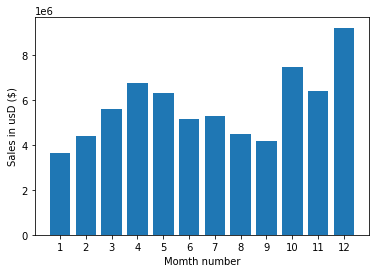

In [17]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Momth number')
plt.ylabel('Sales in usD ($)')
plt.show()

## Question 2:

 Which city had the highest number of sales?

### Data Cleaning

In [18]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [19]:
# Added the state abbreviation, because two cities in different states may have the same name

shopping_df['City'] = shopping_df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
shopping_df['City']

<ipython-input-19-0b576e005159>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['City'] = shopping_df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


0               Portland (ME)
1          San Francisco (CA)
2          New York City (NY)
3                Atlanta (GA)
4                Seattle (WA)
                 ...         
372985       Los Angeles (CA)
372986            Austin (TX)
372987            Boston (MA)
372988            Boston (MA)
372989            Boston (MA)
Name: City, Length: 371900, dtype: object

### Analysis

#### 1.Add a Sales column that contains the total cost of an order.
#### 2.Find the month which has the highest sales and print the sales along with the name of the month.

In [20]:
# 1.Add a Sales column that contains the total cost of an order.

results = shopping_df.groupby('City').sum()
results

,Order ID,Quantity Ordered,Price Each,Hour,Minute,Month,Sales
City,,,,,,,
Atlanta (GA),6.847677e+09,33204.0,5.559816e+06,428528,885864,209588,5.590997e+06
Austin (TX),4.561964e+09,22306.0,3.619747e+06,283892,578120,139658,3.639164e+06
Boston (MA),9.196531e+09,45056.0,7.274820e+06,576450,1180884,282224,7.323284e+06
Dallas (TX),6.831287e+09,33460.0,5.505256e+06,428780,870310,209240,5.535951e+06
Los Angeles (CA),1.362217e+10,66578.0,1.084287e+07,854888,1733276,416650,1.090514e+07
New York City (NY),1.147267e+10,55864.0,9.270742e+06,715392,1467196,351482,9.328635e+06
Portland (ME),1.126533e+09,5500.0,8.943785e+05,70422,145712,34288,8.995165e+05
Portland (OR),4.611189e+09,22606.0,3.721116e+06,288842,591066,141242,3.741465e+06
San Francisco (CA),2.060889e+10,100478.0,1.642292e+07,1286530,2638954,631040,1.652441e+07


In [21]:
# 2.Find the month which has the highest sales and print the sales along with the name of the month.

results['Sales'].idxmax()

' San Francisco (CA)'

### Plotting

In [22]:
import matplotlib.pyplot as plt

cities = results.index.values

 

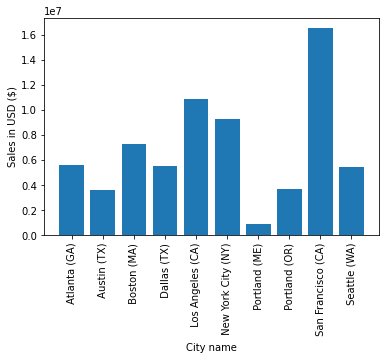

In [23]:
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.xlabel('City name')
plt.ylabel('Sales in USD ($)')
plt.show()

### Question 3:
What is the best time to display advertisements to maximize the likelihood of customers' buying products?

### Analysis
 

In [24]:
# Find the total number of orders made each hour.
# Find the hour with the highest number of orders

results1 = shopping_df.groupby(['Hour']).count()['Order ID']

print("results1" ,results1.idxmax())
print(results1,("/n"))

results1 19
Hour
0      7820
1      4700
2      2486
3      1662
4      1708
5      2642
6      4964
7      8022
8     12512
9     17496
10    21888
11    24822
12    25174
13    24258
14    21968
15    20350
16    20768
17    21798
18    24560
19    25810
20    24456
21    21842
22    17644
23    12550
Name: Order ID, dtype: int64 /n


### Plotting

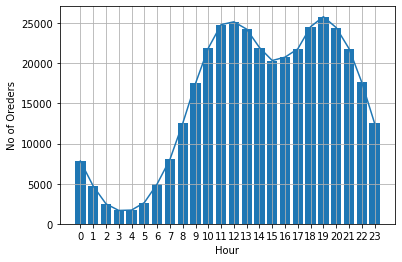

In [25]:
hours = results1.index.values
plt.plot(hours, results1)
plt.bar(hours, results1)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel("No of Oreders")
plt.grid()
plt.show()

### Question 4:
What products are most often sold together?

### Analysis-1

Find the set of products(Grouped orders) ordered together.

In [26]:
shopping_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Minute,Month,Sales,City
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",1,35,2,700.00,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",7,24,2,3.84,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",9,46,2,389.99,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",16,47,2,14.95,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",20,32,2,7.68,Seattle (WA)


### Cleaning data

In [27]:
shopping_df['Grouped Orders'] = shopping_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
shopping_df['Grouped Orders']

<ipython-input-27-a6572564116e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Grouped Orders'] = shopping_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


0                                             iPhone,iPhone
1               AA Batteries (4-pack),AA Batteries (4-pack)
2             27in 4K Gaming Monitor,27in 4K Gaming Monitor
3         Lightning Charging Cable,Lightning Charging Cable
4               AA Batteries (4-pack),AA Batteries (4-pack)
                                ...                        
372985        AAA Batteries (4-pack),AAA Batteries (4-pack)
372986            USB-C Charging Cable,USB-C Charging Cable
372987    Lightning Charging Cable,Lightning Charging Cable
372988        AAA Batteries (4-pack),AAA Batteries (4-pack)
372989                            Google Phone,Google Phone
Name: Grouped Orders, Length: 371900, dtype: object

In [28]:
# Remove any duplicate Grouped Orders that have the same Order I

shopping_df[['Order ID', 'Grouped Orders']].drop_duplicates(inplace = True)
shopping_df

<ipython-input-28-d64fab186c67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df[['Order ID', 'Grouped Orders']].drop_duplicates(inplace = True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Minute,Month,Sales,City,Grouped Orders
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",1,35,2,700.00,Portland (ME),"iPhone,iPhone"
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",7,24,2,3.84,San Francisco (CA),"AA Batteries (4-pack),AA Batteries (4-pack)"
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",9,46,2,389.99,New York City (NY),"27in 4K Gaming Monitor,27in 4K Gaming Monitor"
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",16,47,2,14.95,Atlanta (GA),"Lightning Charging Cable,Lightning Charging Cable"
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",20,32,2,7.68,Seattle (WA),"AA Batteries (4-pack),AA Batteries (4-pack)"
...,...,...,...,...,...,...,...,...,...,...,...,...
372985,295660,AAA Batteries (4-pack),2,2.99,2019-11-04 14:17:00,"574 4th St, Los Angeles, CA 90001",14,17,11,5.98,Los Angeles (CA),"AAA Batteries (4-pack),AAA Batteries (4-pack)"
372986,295661,USB-C Charging Cable,1,11.95,2019-11-23 07:22:00,"359 1st St, Austin, TX 73301",7,22,11,11.95,Austin (TX),"USB-C Charging Cable,USB-C Charging Cable"
372987,295662,Lightning Charging Cable,1,14.95,2019-11-13 16:12:00,"900 10th St, Boston, MA 02215",16,12,11,14.95,Boston (MA),"Lightning Charging Cable,Lightning Charging Cable"
372988,295663,AAA Batteries (4-pack),1,2.99,2019-11-17 17:08:00,"592 Sunset St, Boston, MA 02215",17,8,11,2.99,Boston (MA),"AAA Batteries (4-pack),AAA Batteries (4-pack)"


### Analysis-2

Find the most common Grouped Orders

In [29]:
shopping_df['Grouped Orders'].value_counts().head(10)

Lightning Charging Cable,Lightning Charging Cable        39662
AAA Batteries (4-pack),AAA Batteries (4-pack)            39652
AA Batteries (4-pack),AA Batteries (4-pack)              39618
USB-C Charging Cable,USB-C Charging Cable                39584
Wired Headphones,Wired Headphones                        34416
Apple Airpods Headphones,Apple Airpods Headphones        29150
Bose SoundSport Headphones,Bose SoundSport Headphones    25010
27in FHD Monitor,27in FHD Monitor                        14426
27in 4K Gaming Monitor,27in 4K Gaming Monitor            11958
34in Ultrawide Monitor,34in Ultrawide Monitor            11870
Name: Grouped Orders, dtype: int64

### Question 5:
Which product has the highest sales(based on quantity)? Why do you think it has the highest sales? 


### Analysis


In [30]:
# Find the total quantity ordered for each product.
# Find the product with the highest sales.

product_group = shopping_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
print(quantity_ordered, "\n")
print("Product Name:=", quantity_ordered.idxmax())

Product
20in Monitor                   8258.0
27in 4K Gaming Monitor        12488.0
27in FHD Monitor              15100.0
34in Ultrawide Monitor        12398.0
AA Batteries (4-pack)         55270.0
AAA Batteries (4-pack)        62034.0
Apple Airpods Headphones      31322.0
Bose SoundSport Headphones    26914.0
Flatscreen TV                  9638.0
Google Phone                  11064.0
LG Dryer                       1292.0
LG Washing Machine             1332.0
Lightning Charging Cable      46434.0
Macbook Pro Laptop             9456.0
ThinkPad Laptop                8260.0
USB-C Charging Cable          47950.0
Vareebadd Phone                4136.0
Wired Headphones              41114.0
iPhone                        13698.0
Name: Quantity Ordered, dtype: float64 

Product Name:= AAA Batteries (4-pack)


### Plotting

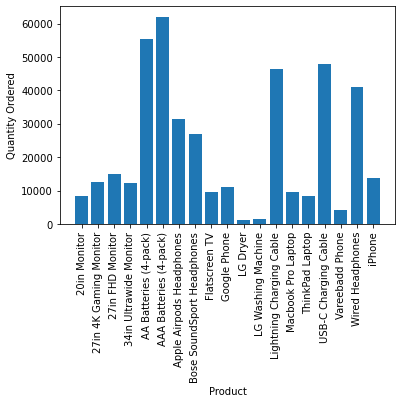

In [31]:

products = quantity_ordered.index.values

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

In [32]:
prices = shopping_df.groupby("Product").mean()['Price Each']

<ipython-input-33-797c29c00ee6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


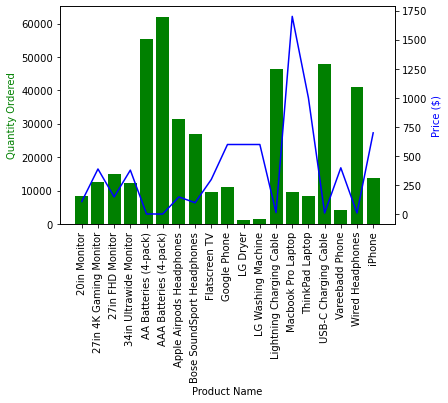

In [33]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical')

plt.show()

### Question 4:
Find the products with the highest popularity in each month of the year 2019.

### Cleaning data 

In [34]:
# Add a new column if needed

shopping_df['Year'] = shopping_df['Order Date'].dt.year 
shopping_df  = shopping_df[shopping_df['Year']==2019] # Extracting 2019 Year data
shopping_df['Month'] = shopping_df['Order Date'].dt.month

<ipython-input-34-2851953028a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Year'] = shopping_df['Order Date'].dt.year
<ipython-input-34-2851953028a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_df['Month'] = shopping_df['Order Date'].dt.month


### Analysis

In [35]:
# Find the total quantity ordered for each product in each month.
# Find the product with the maximum quantity ordered for each month.

product_group = shopping_df.groupby(['Month','Product'], as_index=False)['Quantity Ordered'].sum()
product_df = pd.DataFrame(product_group)
indexes = product_df.groupby(['Month']).idxmax()['Quantity Ordered']
product_df.iloc[indexes]

,Month,Product,Quantity Ordered
5,1,AAA Batteries (4-pack),3190
24,2,AAA Batteries (4-pack),3944
43,3,AAA Batteries (4-pack),4958
62,4,AAA Batteries (4-pack),5878
81,5,AAA Batteries (4-pack),5854
100,6,AAA Batteries (4-pack),4324
119,7,AAA Batteries (4-pack),4730
138,8,AAA Batteries (4-pack),4042
157,9,AAA Batteries (4-pack),3846
176,10,AAA Batteries (4-pack),6726
